In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import random
%matplotlib inline

## Cross-sectional Estimator

In [3]:
n = 1000
T = np.random.choice(2, n)
eps = 0.5*np.random.normal(size=n)
y = 0.5 + 2*T + eps
print(T[:20])
y[:30]

[0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0]


array([ 1.08148829,  2.81519002,  2.6998536 ,  2.57842827,  3.00884954,
        2.30942497,  1.12174661,  1.01627334,  0.31789216,  0.3856199 ,
        0.9842105 ,  1.08976251,  0.53599748,  0.76435633,  0.21896646,
        0.39057926,  2.64963166,  0.11068811, -0.19414559,  1.0273713 ,
        2.10600827,  2.42222275,  0.74370904,  3.03720784,  2.9783414 ,
        2.67866987,  0.00523194,  0.1835835 ,  2.00513894,  2.71361112])

In [4]:
df = pd.DataFrame({"y" : y, "T" : T })
print(df.head(10))

   T         y
0  0  1.081488
1  1  2.815190
2  1  2.699854
3  1  2.578428
4  1  3.008850
5  1  2.309425
6  0  1.121747
7  0  1.016273
8  0  0.317892
9  0  0.385620


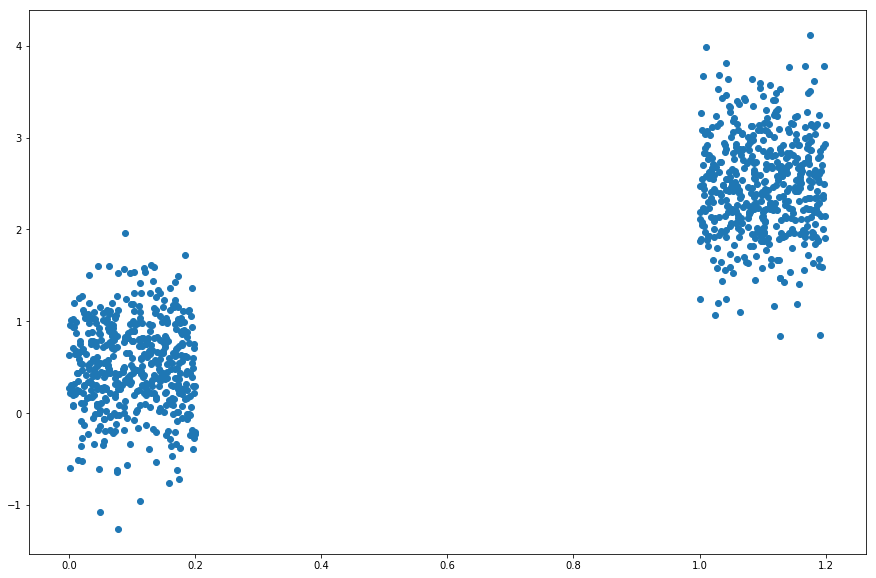

In [5]:
plt.figure(figsize=(15,10))
plt.scatter(df['T'] + 0.2*np.random.uniform(size=n), df['y'])

In [6]:
df.groupby("T").mean()

,y
T,
0,0.513153
1,2.490877


In [9]:
m = smf.ols(formula = "y~T", data=df).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     3717.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        17:57:27   Log-Likelihood:                -750.15
No. Observations:                1000   AIC:                             1504.
Df Residuals:                     998   BIC:                             1514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5132      0.023     22.217      0.000       0.468       0.558
T              1.9777      0.032     60.969      0.000       1.914       2.041
==============================================================================
Omnibus:                        2.341   Durbin-Watson:                   2.068
Prob(Omnibus):                  0.310   Jarque-Bera (JB):                2.241
Skew:                          -0.077   Prob(JB):                        0.326
Kurtosis:                       3.173   Cond. No.                         2.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Before-after

In [10]:
n = 1000
time = np.random.choice(2, n)
eps = 0.5*np.random.normal(size=n)
jobs = 0.5 + 2*(time > 0) + eps
jobs[:30]

array([ 0.41337955,  1.9251024 ,  3.12773103,  1.04239986,  2.28186779,
        1.16376176,  1.83108797, -0.13619845,  1.66691198,  2.42835832,
        0.46075636,  2.21009393, -0.45644257,  2.42652263,  2.99913615,
        2.31055889,  0.72598024,  0.08514831,  1.9069776 ,  1.12983757,
        2.80010208,  2.22470762,  0.21430007,  3.92892427,  2.12801664,
        2.4638724 ,  0.30379736,  0.76432144,  2.27450412,  0.26144835])

In [11]:
tc = pd.DataFrame({"jobs" : jobs, "time" : time })
print(tc.head(10))

       jobs  time
0  0.413380     0
1  1.925102     1
2  3.127731     1
3  1.042400     0
4  2.281868     1
5  1.163762     0
6  1.831088     0
7 -0.136198     0
8  1.666912     1
9  2.428358     1


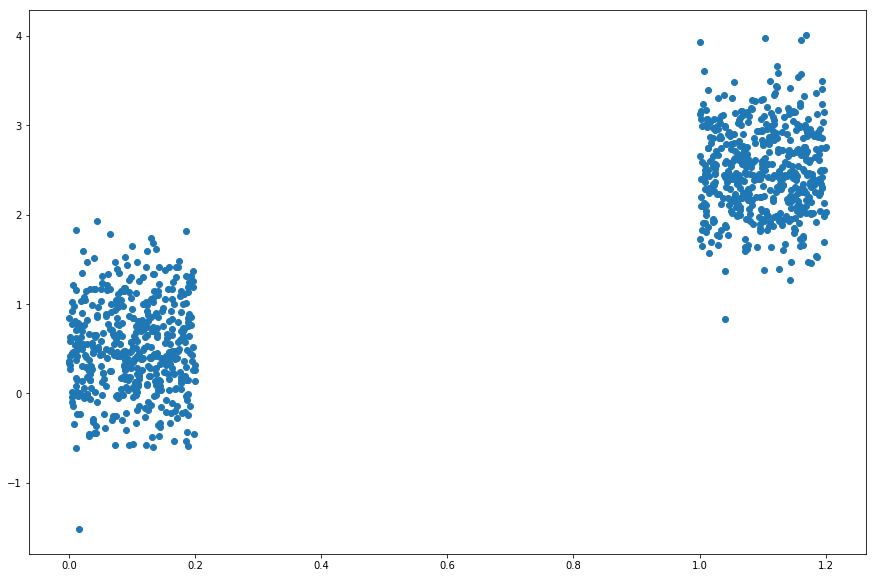

In [12]:
plt.figure(figsize=(15,10))
plt.scatter(tc['time'] + 0.2*np.random.uniform(size=n), tc['jobs'])

In [13]:
m = smf.ols(formula = "jobs~time", data=tc).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                   jobs   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.800
Method:                 Least Squares   F-statistic:                     3995.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        18:03:56   Log-Likelihood:                -722.94
No. Observations:                1000   AIC:                             1450.
Df Residuals:                     998   BIC:                             1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.5026      0.022     22.404      0.0

## Dif-in-dif estimator

In [14]:
n = 1000
country = np.random.choice(['us','ca'], n)
print(country[:10])
time = np.random.choice(['b', 'a'], n)
eps = 0.5*np.random.normal(size=n)
jobs = 0.5 + 2*(country == 'us') + 0.8*(time == 'a') + 0.5*(time == 'a')*(country =='us') + eps
didDf = pd.DataFrame({"jobs" : jobs, "country" : country, 'time':time })
didDf.head()

['ca' 'us' 'ca' 'us' 'ca' 'us' 'us' 'us' 'ca' 'ca']


,country,jobs,time
0,ca,0.379244,b
1,us,2.663917,b
2,ca,1.016928,a
3,us,1.951958,b
4,ca,1.578493,a


In [15]:
didDf.groupby(['country', 'time']).mean()

jobs
country time          
ca      a     1.295124
        b     0.540259
us      a     3.815224
        b     2.488749

In [17]:
m = smf.ols(formula = "jobs~time*country", data=didDf).fit()
m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   jobs   R-squared:                       0.862
Model:                            OLS   Adj. R-squared:                  0.861
Method:                 Least Squares   F-statistic:                     2072.
Date:                Wed, 18 Apr 2018   Prob (F-statistic):               0.00
Time:                        21:49:41   Log-Likelihood:                -707.05
No. Observations:                1000   AIC:                             1422.
Df Residuals:                     996   BIC:                             1442.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
===========================================================================================
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                   1.2951      0.031     41.480      0.000       1.234       1.356
time[T.b]                  -0.7549      0.046    -16.536      0.000      -0.844      -0.665
country[T.us]               2.5201      0.044     57.850      0.000       2.435       2.606
time[T.b]:country[T.us]    -0.5716      0.062     -9.158      0.000      -0.694      -0.449
==============================================================================
Omnibus:                        3.406   Durbin-Watson:                   1.958
Prob(Omnibus):                  0.182   Jarque-Bera (JB):                3.465
Skew:                          -0.129   Prob(JB):                        0.177
Kurtosis:                       2.870   Cond. No.                         7.02
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""